# Tokens, Types and TTR of corpus

In [1]:
import pandas as pd
import string
import re
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import sympy as sym
data = pd.read_csv("C:/Users/Dell_Owner/Desktop/tweets-dataset.csv")

In [2]:
a = data.values.tolist()
for i in range (len(a)):
    a[i][0] = a[i][0].lower()

In [3]:
b = [re.sub(r'https\S+', "", str(x)) for x in a]
b = [re.sub(r'@\S+', "", str(x)) for x in b]
b = [re.sub(r'[^A-Za-z]+', " ", str(x)) for x in b]

In [4]:
count = 0
count1 = 0
x = []
y = []
c = {}
for j in range (len(b)):
    t = b[j].split()
    count = count+len(t)
    for i in t:
        if i not in c:
            c[i] = 1
        else:
            c[i]+=1
    if j%250==0:
        x.append(count)
        y.append(len(c))
    print(t)

['nahi', 'nahi', 'mere', 'saath', 'jaakar', 'pachtaogi', 'ye', 'uunnglee', 'is', 'the', 'best', 'all', 'girls', 'say', 'that']
['going', 'to', 'the', 'grammys', 'first', 'entertainment', 'law', 'breakfast', 'here', 'in', 'nyc', 'tomorrow', 'i', 'm', 'so', 'excited', 'one', 'step', 'closer']
['bohot', 'hi', 'badiya', 'ji', 'aap', 'sunao']
['parvez', 'musharraf', 'is', 'digvijay', 'singh', 'of', 'pakistan']
['guddu', 'ko', 'bass', 'john', 'cena', 'k', 'sticker', 'ki', 'padii', 'hai', 'd', 'd']
['aman', 'ki', 'maa', 'ki', 'asha']
['pakistan', 'can', 'wait', 'more', 'more', 'and', 'more', 'aakhir', 'pakistan', 'wait', 'karne', 'me', 'number', 'hai', 'hahahahhahahaha']
['jai', 'mahesh']
['rt', 'aap', 'najafgarh', 'rt', 'aapinnews', 'when', 'ddca', 'lowered', 'the', 'bar', 'bottles', 'broke', 'liquor', 'supplied', 'to', 'police']
['kaam', 'ho', 'jayega', 'thoda', 'kharcha', 'paani', 'lagega', 'n', 'sirf', 'kharche', 'se', 'kaam', 'nahin', 'chalega', 'conversationsindelhitoday']
['nahi', 'nah

['bhenchod', 'ghar', 'pe', 'maggi', 'khatam', 'ho', 'gai', 'hai']
['nahi', 'main', 'chalaak', 'hu', 'ruka', 'hu', 'ab', 'tak', 'tinke', 'ka', 'sahara', 'hai']
['yes', 'bhai', 'bihar', 'me', 'bahaar', 'ho', 'nitish', 'kumar', 'baahar', 'ho', 'nitishkanaklivikas']
['i', 'love', 'u', 'salman', 'bhai', 'bajrangi', 'bhaijaan']
['wapas', 'aa', 'jao', 'kuch', 'naho', 'bolega']
['rt', 'yese', 'pitch', 'pe', 'runs', 'banana', 'talent', 'ka', 'kaam', 'hai', 'indvspak']
['aage', 'se', 'dhyan', 'se', 'dekhunga']
['chup', 'ho', 'ja', 'chutiye', 'pehle', 'issue', 'to', 'pata', 'karle', 'jab', 'dekho', 'bjp', 'ke', 'naare', 'lagata', 'hai']
['bc', 'is', 'chutiye', 'trump', 'ko', 'nagpur', 'bhejo']
['ye', 'fake', 'id', 'h', 'salman', 'sir', 'ki', 'kyuki', 'esa', 'ho', 'nhi', 'skta', 'ki', 'salman', 'sir', 'ko', 'sat', 'shree', 'akal', 'likhna', 'aata']
['nhi', 'aane', 'wale', 'aap', 'pta', 'h', 'sbko', 'hhahah']
['kaam', 'na', 'karo', 'magar', 'kaam', 'ki', 'fikr', 'zaroor', 'karo', 'agar', 'fikr', 'n

['or', 'papa', 'ko', 'nai', 'cassette', 'kharidne', 'ko', 'bolo', 'to', 'ye', 'wali', 'lake', 'dikhate', 'the', 'or', 'bolte', 'the', 'pehle', 'iske', 'to', 'sare', 'games', 'khelo']
['main', 'uske', 'bachhe', 'ki', 'maa', 'banne', 'wali', 'hu', 'tumhare', 'nahi', 'twistedbollywooddialogues']
['how', 'do', 'u', 'know', 'p']
['haan', 'bhai', 'isiliye', 'tumne', 'pichle', 'saalo', 'me', 'koi', 'vikas', 'kiya', 'hi', 'nahi']
['my', 'teachers', 'call', 'themselves', 'givng', 'us', 'candy', 'wasn', 't', 'even', 'the', 'good', 'stuff', 'i', 'might', 'go', 'to', 'walmart', 'or', 'cvs', 'tomorrow']
['nahi', 'be', 'mere', 'naam', 'pe', 'hai']
['kutta', 'agar', 'maidaan', 'mein', 'aaya', 'toh', 'ball', 'se', 'hi', 'marega', 'abhijeet', 'n', 'ddvskkr']
['farhan', 'akhtar', 'divorced', 'wazir', 'ghode', 'ki', 'chaal', 'chal', 'gaya']
['daare', 'hue', 'sarkar', 'ki', 'dari', 'hui', 'harkat', 'nitishkachehradiveshsehra']
['woow', 'aap', 'se', 'fb', 'per', 'ho', 'me', 'to', 'me', 'fb', 'per', 'aai']


['ye', 'kaunsi', 'chidiya', 'ka', 'naam', 'hai']
['in', 'games', 'k', 'b', 'apne', 'alag', 'maje', 'the']
['like', 'jagya', 'of', 'balika', 'vadhu']
['laddo', 'kha', 'lo', 'rs', 'ke', 'aur', 'apna', 'muh', 'band', 'karlopic', 'twitter', 'com', 'sg', 'onbni', 'a']
['aap', 'ko', 'bhi', 'shubh', 'mahashivratri', 'om', 'namo', 'shivaya', 'om', 'namo', 'shivaya']
['ye', 'galat', 'fehmi', 'tumhare', 'andar', 'kaise', 'aa', 'gayee', 'pic', 'twitter', 'com', 'llpn', 'oxrn']
['yaar', 'dog', 'will', 'be', 'there', 'dahej', 'mein', 'main', 'aajaunga', 'tumahre', 'ghar', 'rehne', 'ke', 'liye']
['railbudget', 'prabhu', 's', 'maiden', 'apolitical', 'practical', 'and', 'visionary', 'rail', 'budget', 'for', 'aspirational', 'india', 'find', 'key', 'http', 't', 'co', 'yflobgljcq']
['uske', 'toh', 'totey', 'udd', 'gaye', 'hongey']
['peeche', 'item', 'kaun', 'hai']
['is', 'baar', 'hum', 'diwali', 'thodi', 'alag', 'aur', 'hatke', 'manayenge', 'bolo', 'yeh', 'idea', 'kaisa', 'hai', 'kuch', 'daag', 'ache', '

['abey', 'yaar', 'kiske', 'sath', 'khada', 'kar', 'diya', 'pic', 'twitter', 'com', 'mbbzunrknh']
['bhai', 'craft', 'ke', 'exam', 'ke', 'din', 'to', 'papa', 'ka', 'scooter', 'aur', 'mummy', 'ki', 'craft', 'bas', 'ban', 'gya', 'craft', 'a']
['sahi', 'time', 'par', 'captaincy', 'chor', 'di', 'ab', 'aaram', 'se', 'enjoy', 'kar', 'paega', 'batting', 'dhoni']
['loads', 'of', 'goodies', 'from', 'house', 'of', 'wilde', 'stylestalker', 'staple', 'the', 'label', 'fairground', 'and', 'piper', 'lane', 'will', 'be', 'available', 'tomorrow', 'stay', 'tuned', 'xx']
['mat', 'karo', 'aisi', 'baatein', 'kunwaare', 'rahoge', 'zindagi', 'bhar']
['drama', 'king', 'guddu', 'd', 'p']
['humare', 'up', 'mai', 'bhi', 'd']
['toi', 'israel', 'admits', 'killing', 'of', 'arafat', 's', 'deputy', 'israel', 'for', 'the', 'first', 'time', 'on', 'thursday', 'admitted', 'responsibility', 'http', 'url']
['internal', 'enquiry', 'main', 'rss', 'ke', 'lov', 'honge']
['sharma', 'ji', 'ka', 'bahu', 'charchit', 'launda', 'rofl'

['jisne', 'kari', 'sharam', 'uske', 'phoote', 'karam']
['bumrah', 'bhai', 'itni', 'yorkers', 'maarta', 'hai', 'ek', 'to', 'khel', 'bhi', 'leta']
['mohit', 'sharma', 'ko', 'wicket', 'something', 'seriously', 'wrong', 'with', 'sa', 'savsind']
['tu', 'bada', 'active', 'ho', 'rakha', 'hai', 'bhai', 'garbage', 'bin']
['muje', 'aap', 'bhout', 'aache', 'lagkte', 'hai', 'bachpan', 'se', 'dekti', 'aa', 'rai', 'hu', 'or', 'marte', 'dam', 'tak', 'dekungi', 'i', 'am', 'a', 'big', 'fan', 'rm', 'nepal']
['nahi', 'chahiye', 'doga', 'maine', 'soch', 'lliya', 'hai', 'ki', 'apna', 'jeewan', 'twitter', 'par', 'pseudo', 'nationalist', 'ban', 'kar', 'samarpan', 'kar', 'du']
['painter', 'babu', 'humri', 'life', 'tanik', 'aasaan', 'bana', 'diye', 'hain', 'thanksva', 'crashthepepsiipl']
['zayn', 'ne', 'band', 'chhoda', 'hai', 'duniya', 'nahi', 'ripzayn']
['sir', 'pootna', 'ki', 'kasam', 'maine', 'aisa', 'kuch', 'nahi', 'kiya']
['sportsroom', 'guy', 'is', 'not', 'paying', 'any', 'attention']
['teri', 'aankhein

['lekin', 'yeh', 'samaaj']
['th', 'stage', 'ka', 'rd', 'level', 'kafi', 'difficult', 'hai']
['ek', 'ko', 'convert', 'karna', 'nahi', 'aata', 'chutiye', 'hai']
['roma', 'bhi', 'bohot', 'maal', 'hai']
['salaaa', 'dil', 'khush', 'ho', 'gaya', 'padhke', 'p']
['bhaiyya', 'sukkhi', 'puri', 'do', 'na', 'please', 'jaldi', 'teekha', 'laga', 'n', 'womenissues']
['sir', 'ap', 'ki', 'sarkar', 'to', 'blue', 'whale', 'game', 'se', 'b', 'zyada', 'khatrnak', 'hai', 'gst', 'dukandaro', 'ki', 'jaan', 'lo', 'ge', 'kya', 'sahab', 'faltu', 'ki', 'formalities']
['dhoni', 'aur', 'morph', 'karo', 'saalon', 'asiacupt', 'final']
['bhai', 'bohot', 'ho', 'gayee', 'bakar', 'bakar', 'jaa', 'so', 'ja', 'uth', 'ke', 'mummy', 'bournvita', 'pilaegi']
['jonas', 'brothers', 'are', 'gonna', 'go', 'live', 'at', 'fort', 'canning', 'on', 'the', 'nd', 'hmmmm']
['tomorrow', 'the', 'biggest', 'name', 'in', 'music', 'amp', 'entertainment', 'is', 'on', 'the', 'show', 'and', 'no', 'it', 's', 'not', 'ricky', 'martin', 'who', 'is', 

['tula', 'agodharach', 'vicharla', 'mi', 'tuch', 'ekdam', 'kuskat', 'hoti', 'mazya', 'barobar']
['salman', 'ji', 'apka', 'favorite', 'gana', 'konsa', 'hai', 'bajrangi', 'bhaijan', 'film', 'ka']
['afterwork', 'social', 's', 'king', 'dr', 'from', 'saturday', 'steppin', 'food', 'drinks', 'days', 'work', 'and', 'sixth', 'day', 'for', 'relaxation']
['ye', 'ketu', 'aur', 'rajdeep', 'rahu']
['ambuja', 'cement', 'se', 'chipka', 'do', 'guduu', 'ko']
['dil', 'mein', 'apne', 'monday', 'ka', 'darr', 'lekar', 'jaage', 'ho', 'toh', 'zinda', 'ho', 'tum']
['abe', 'me', 'lee', 'hai', 'maine']
['eet', 'ka', 'jawaab', 'pathar', 'sepic', 'twitter', 'com', 'zktq', 'szqmo']
['rt', 'gets', 'up', 'voice', 'from', 'the', 'lounge', 'aur', 'dekho', 'aik', 'aur', 'supporter', 'jaag', 'gyi', 'hai']
['jb', 'pehle', 'hi', 'pta', 'hai', 'ki', 'ye', 'tingu', 'lofer', 'hai', 'd']
['baby', 'ko', 'sirf', 'nalayak', 'haramkhor', 'ladke', 'hi', 'pasand', 'hai']
['yea', 'i', 'can', 'not', 'disagree', 'with', 'the', 'confess

['mhaari', 'chhori', 'chhoron', 'se', 'kam', 'hai', 'ke', 'shatrughan', 'sinha']
['wait', 'makeinindia', 'is', 'that', 'initiative']
['terrible', 'play', 'call', 'on', 'nd', 'and', 'victor', 'cruz', 'on', 'a', 'slant', 'te', 'nicks', 'sideline', 'how', 'about', 'any', 'of', 'those']
['have', 'you', 'ever', 'forgotten', 'to', 'get', 'a', 'valentine', 's', 'present', 'your', 'chance', 'at', 'feb', 'bonjovi', 'tix', 'coming', 'up']
['ye', 'wohi', 'aadmi', 'hai', 'na', 'but', 'with', 'degree']
['mi', 'maratha', 'naahi', 'pan', 'marathi', 'kalte', 'tumcha', 'dhanywaad']
['mere', 'muuh', 'ke', 'baat', 'cheen', 'lee', 'basically', 'i', 'missing', 'zaya', 'x', 'd']
['sharminda', 'na', 'karo', 'ek', 'ladki', 'nahi', 'hai', 'life', 'mein']
['we', 'do', 'so', 'in', 'iit', 'only', 'coz', 'hamein', 'iit', 'mein', 'koi', 'bandi', 'nahi', 'chahiye', 'd', 'p']
['shaadi', 'me', 'zaroor', 'bulana', 'bhai']
['abe', 'wo', 'abhi', 'ki', 'bahen']
['apna', 'kuch', 'nahi', 'hoga', 'kuwaare', 'marr', 'jayenge'

['kobe', 'in', 'the', 'th', 'is', 'like', 'eli', 'manning', 'beware']
['yaatriyon', 'se', 'nivedan', 'hai', 'kisi', 'bhi', 'sandigdh', 'vastu', 'ko', 'haath', 'na', 'lagaye', 'uska', 'bf', 'saath', 'ho', 'sakta', 'hai']
['har', 'jeet', 'cheen', 'le', 'har', 'se', 'india', 'wale', 'dusaman', 'ke', 'chakke', 'chhuda', 'de', 'ham', 'india', 'wale', 'go', 'go', 'india', 'indvssa']
['saale', 'tu', 'bhai', 'hai', 'shukriya']
['notebandi', 'k', 'baare', 'me', 'abhi', 'aur', 'kitne', 'clarifications', 'aane', 'baqi', 'hain', 'mantrimahodaya']
['rt', 'hbdintellectualaffan', 'how', 'hes', 'intellectual', 'telephone', 'ijaaad', 'kiya', 'tha', 'kya', 'barish', 'main', 'viper', 'maarta', 'hai', 'mu', 'se', 'muchlee']
['ab', 'ki', 'baar', 'malabar', 'modiindubai', 'fake']
['bottle', 'rakh', 'ke', 'tweeto', 'bhai', 'apni', 'hi', 'pol', 'khol', 'rahe', 'ho']
['kadhi', 'tari', 'zhopa', 'velevar', 'hey', 'chaavatpana', 'bandh', 'kara']
['guddu', 'bada', 'hi', 'bhaukali', 'he', 'yr']
['me', 'khane', 'mei

['tadka', 'singh', 'ji', 'aapki', 'baato', 'me', 'hamesha', 'se', 'bohot', 'dam', 'hota', 'hai']
['pagal', 'ho', 'gaya', 'hai']
['hoy', 'rao', 'aahe', 'itthe', 'ashi', 'loka', 'saunsaar', 'zaalu', 'de', 'pan', 'tyaanna', 'gharnedi', 'poetry', 'karaychis', 'aste', 'khoopach', 'khaaz']
['rt', 'tyagi', 'and', 'khaitan', 'are', 'examples', 'of', 'behti', 'ganga', 'me', 'haath', 'dho', 'lena', 'rm', 'in', 'ls', 'agustawestlandscam']
['ye', 'naya', 'bhikari', 'kaun', 'hai', 'attention', 'lene', 'aa', 'gaya', 'n', 'n']
['he', 'ishwar', 'maney', 'jer', 'pachaav', 'va', 'ni', 'ane', 'amrut', 'jirav', 'va', 'ni', 'shakti', 'de', 'mahashivratri', 'greetings', 'to', 'all', 'http', 't', 'co', 'tyhqorgcse']
['magar', 'hum', 'donon', 'ko', 'bilkul', 'mazza', 'nahi', 'aata', 'n', 'p']
['chee', 'sir', 'kya', 'dikha', 'diya', 'office', 'me', 'badiya', 'neend', 'aa', 'rahi', 'thi', 'khul', 'gayee']
['kabhi', 'kabhi', 'accha', 'bolta', 'hai', 'good', 'one']
['breaking', 'dawn', 'is', 'coming', 'out', 'on'

['kamaal', 'karte', 'ho', 'pandey', 'ji']
['main', 'aaj', 'bhi', 'phenke', 'hue', 'condoms', 'nahi', 'uthata', 'condomsfilmystyle']
['bjp', 'ye', 'nahi', 'samajh', 'paayi', 'ki', 'sekadon', 'vyapari', 'jinko', 'congressi', 'tax', 'vyavshtha', 'ne', 'do', 'number', 'mein', 'kamaai', 'ke', 'avsar', 'diye', 'wo', 'gst', 'ke', 'baad', 'short', 'cut', 'kamaai', 'se', 'chuuk', 'jaayengey', 'aur', 'galiyaan', 'dengey']
['waah', 'mohit', 'kya', 'profile', 'pic', 'rakha', 'hai', 'amazing', 'hai']
['damn', 'balika', 'vadhu', 'actress', 'pratyusha', 'banerjee', 'committed', 'suicide']
['tu', 'kisi', 'rail', 'si', 'guzarti', 'hai', 'main', 'kisi', 'passenger', 'sa', 'ghus', 'jaata', 'hu']
['accha', 'mujhey', 'per', 'different', 'story', 'pata', 'hai', 'khair', 'kiya', 'position', 'chal', 'rahe', 'hai']
['this', 'friday', 'we', 'celebrate', 'mock', 'the', 'love', 'of', 'avril', 'and', 'chad', 'http', 'url']
['out', 'castle', 'sun', 'and', 'staying', 'there', 'until', 'tues', 'mother', 'said', 'it',

['abe', 'wo', 'slow', 'khel', 'raha', 'hai']
['bc', 'dost', 'nahi', 'maan', 'raha', 'beer', 'ke', 'baad', 'old', 'monk', 'pila', 'raha', 'hai', 'aaj', 'to', 'ulti', 'pakki']
['come', 'out', 'and', 'join', 'us', 'for', 'the', 'sia', 'trek', 'or', 'treat', 'october', 'th', 'http', 'url', 'it', 's', 'a', 'fundraiser', 'for', 'the', 'safe', 'house']
['ye', 'japan', 'wali', 'ms', 'gaand', 'soonglee', 'ka', 'bhai', 'hai', 'kya']
['arre', 'arre', 'aise', 'emotional', 'mat', 'ho', 'copy', 'ahi', 'kiya', 'tha', 'ntu', 'bata', 'tujhe', 'kisine', 'bola', 'kya', 'aise']
['good', 'point', 'he', 'may', 'still', 'be', 'up', 'he', 's', 'off', 'to', 'las', 'vegas']
['sir', 'electricity', 'usage', 'kam', 'karne', 'ke', 'liye', 'bhi', 'niyam', 'laagu', 'kar', 'do', 'odd', 'day', 'par', 'fan', 'chalega', 'even', 'day', 'par', 'a', 'c']
['haha', 'bhopal', 'ka', 'hi', 'hai']
['kya', 'chutyappa', 'hai', 'main', 'bhijwau']
['bhai', 'kisi', 'aur', 'ki', 'trump', 'taarif', 'bhi', 'nahi', 'kar', 'sakta', 'kya']


['mujhe', 'mil', 'gaya', 'haii']
['i', 'have', 'a', 'date', 'with', 'christian', 'kane', 'and', 'the', 'leverage', 'team', 'that', 'i', 'recorded', 'tues', 'then', 'the', 'finder', 'sexy', 'have', 'fun', 'night', 'night', 'xx']
['who', 'is', 'shakti', 'shetty']
['isiliye', 'ab', 'kejriwal', 'ke', 'samarthan', 'me', 'aa', 'gaye']
['miranda', 'house', 'ka', 'bi', 'page', 'hona', 'chahie', 'ab', 'to', 'd', 'p']
['mishra', 'ji', 'ise', 'haathi', 'bol', 'kar', 'haathi', 'jaise', 'achche', 'jeevo', 'ko', 'gaaliya', 'na', 'de']
['ye', 'sach', 'hai', 'milord']
['saal', 'laloo', 'nitish', 'wat', 'did', 'u', 'get', 'ek', 'toh', 'chara', 'kha', 'gaya', 'doosra', 'chara', 'chor', 'k', 'saath', 'mil', 'gaya', 'badliyesarkarbadliyebihar']
['aajkal', 'hum', 'khud', 'hi', 'ghum', 'rehte', 'hai', 'ladki', 'chhod', 'ke', 'chali', 'gayee', 'dil', 'hi', 'toot', 'k', 'reh', 'gaya', 'hai']
['aapko', 'doubt', 'hai', 'apna', 'phone', 'number', 'dijiye', 'abhi', 'doubt', 'door', 'kiye', 'dete', 'hai']
['hahaha

In [5]:
print("Number of tokens in the corpus is: " + str(count))
print("Number of types in the corpus is: " + str(len(c)))

Number of tokens in the corpus is: 304052
Number of types in the corpus is: 34183


In [6]:
print("The TTR of the corpus is: " +str(len(c)/count))

The TTR of the corpus is: 0.11242484838119796


In [7]:
x1 = np.array(x)
y1 = np.array(y)

# Heap's Law

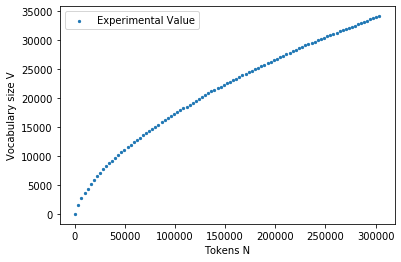

In [8]:
plt.scatter(x,y,s = 5, label = "Experimental Value")
plt.xlabel("Tokens N")
plt.ylabel("Vocabulary size V")
plt.legend()
plt.show()

In [9]:
def func(x,a,b):
    return b*(x**a)
popt, pcov = curve_fit(func, x, y)

In [10]:
print("a = %s , b = %s" % (popt[0], popt[1]))

a = 0.6207921695879094 , b = 13.62145449322949


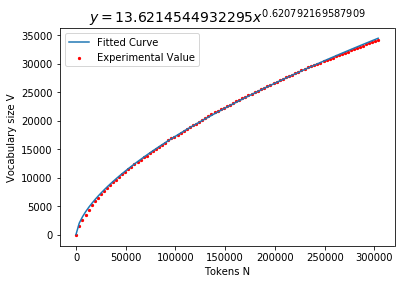

In [11]:
plt.plot(x, func(x, *popt), label="Fitted Curve")
plt.scatter(x,y,s = 5, label = "Experimental Value",c = "r")
plt.legend()
xs = sym.Symbol('x')    
tex = sym.latex(func(xs,*popt)).replace('$', '')
plt.title(r'$y= %s$' %(tex),fontsize=14)
plt.xlabel("Tokens N")
plt.ylabel("Vocabulary size V")
plt.show()

In [12]:
c_sorted = sorted(c.items(), key = lambda t:(t[1], t[0]),reverse = True)
d_sorted = []
for i in range (len(c_sorted)):
    d_sorted.append(c_sorted[i][0])
d = dict(c_sorted)
print(d)

{'hai': 10134, 'to': 4154, 'ki': 3226, 'ke': 3171, 'nahi': 3162, 'bhi': 2929, 'the': 2863, 'se': 2604, 'ho': 2366, 'ka': 2311, 'bhai': 2266, 'ko': 2213, 'me': 1939, 'ye': 1853, 'kya': 1812, 'hi': 1801, 'aur': 1783, 'kar': 1681, 'i': 1499, 'in': 1384, 'n': 1311, 'is': 1291, 'mein': 1277, 'a': 1174, 'ek': 1152, 'and': 1125, 'of': 1073, 'on': 1072, 'na': 1031, 's': 1003, 'toh': 962, 'ab': 949, 'tha': 940, 'rt': 915, 'http': 902, 'you': 885, 'for': 884, 'raha': 869, 'aaj': 868, 'aap': 827, 'par': 826, 'ne': 826, 'hain': 822, 'koi': 798, 'kuch': 793, 'liye': 782, 'd': 765, 'k': 751, 'ji': 751, 'tu': 735, 'twitter': 725, 't': 724, 'it': 703, 'sir': 694, 'p': 694, 'do': 690, 'pe': 666, 'main': 662, 'com': 645, 'gaya': 637, 'mujhe': 636, 'rahe': 622, 'h': 610, 'baat': 601, 'sab': 585, 'be': 578, 'with': 570, 'at': 565, 'aa': 553, 'he': 545, 'de': 536, 'url': 532, 'yaar': 530, 'jo': 525, 'kiya': 509, 'hum': 487, 'hota': 487, 'modi': 484, 'le': 484, 'tum': 472, 'mere': 467, 'diya': 453, 'this': 

# Zipf's Law Showing Inverse Relation between Length and Frequency

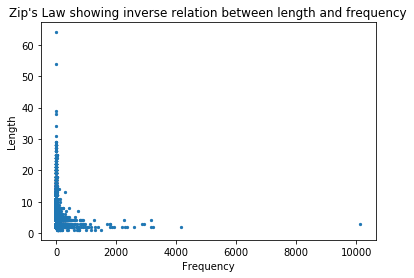

<Figure size 576x288 with 0 Axes>

In [23]:
a1 = []
a2 = []
for i in d:
    a1.append(len(i))
    a2.append(d[i])
plt.scatter(a2,a1,s = 5)
plt.xlabel("Frequency")
plt.ylabel("Length")
plt.title("Zip's Law showing inverse relation between length and frequency")
plt.figure(figsize = (8,4))
plt.show()

# Zipf's Law showing direct relation between number of meanings and square root of frequency

In [14]:
from nltk.corpus import wordnet
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell_Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell_Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

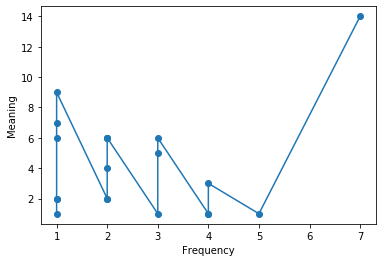

In [160]:
import random
import math
words = random.choices(d_sorted, k=100)
#print(words)
dict2 = dict()
x_new=[]
y_new=[]
for i in words:
    dict2[i] = wordnet.synsets(i)
    sy = wordnet.synsets(i)
    
    if len(sy)>0:
        x_new.append(len(sy[0].lemmas()))
        y_new.append(d[i])

def sort_list(list1, list2): 
    zipped_pairs = zip(list2, list1) 
    z = [x for _, x in sorted(zipped_pairs)]   
    return z 

y_new = sort_list(y_new,x_new)
x_new.sort()

plt.scatter(x_new,y_new)
plt.xlabel("Frequency")
plt.ylabel("Meaning")
plt.plot(x_new,y_new)